In [1]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
import numpy as np
import os

## 找尋資料夾

In [2]:
# 找到路徑下的所有圖片
#Path =  './TraNum/'
#allFile = os.listdir(Path)
#print(allFile)

In [5]:
# 指定要列出所有檔案的目錄
mypath = "TraNum/0"
allfile = []

# 遞迴列出所有檔案的絕對路徑
for root, dirs, files in os.walk(mypath):
    for f in files:
        fullpath = os.path.join(root, f)
        allfile.append(fullpath)
print(len(allfile))

43


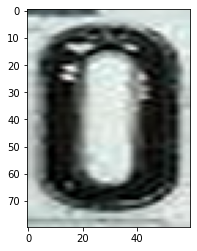

In [6]:
img = cv2.imread(allfile[0])
plt.imshow(img)
plt.show()

In [7]:
def rotaft(img, zoom, angle, shiftx, shifty):
    (rows, cols) = img.shape[:2]

    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, zoom)    # ((Rotate middle point), Rotate Angle, Zoom縮放)
    rotate = cv2.warpAffine(img, M, (cols, rows),borderValue=(255,255,255))  

    M = np.float32([[1, 0, shiftx], [0, 1, shifty]])     # ([[1, 0, shift_x], [0, 1, shift_y]]) 
    shift = cv2.warpAffine(rotate, M, (cols, rows),borderValue=(255,255,255))  
    
    return shift

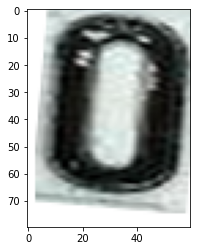

In [8]:
new = rotaft(img, 0.95, -5, 3, -5) # (img, zoom, angle, shiftx, shifty)
# angle--> 10 x--> 3  y-->5 
plt.imshow(new)
plt.show()

## Start create

TraNum/0\101.png


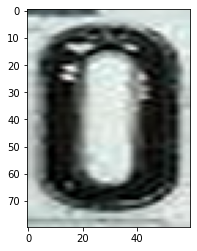

In [9]:
img = cv2.imread(allfile[0])
print(allfile[0])
plt.imshow(img)
plt.show()

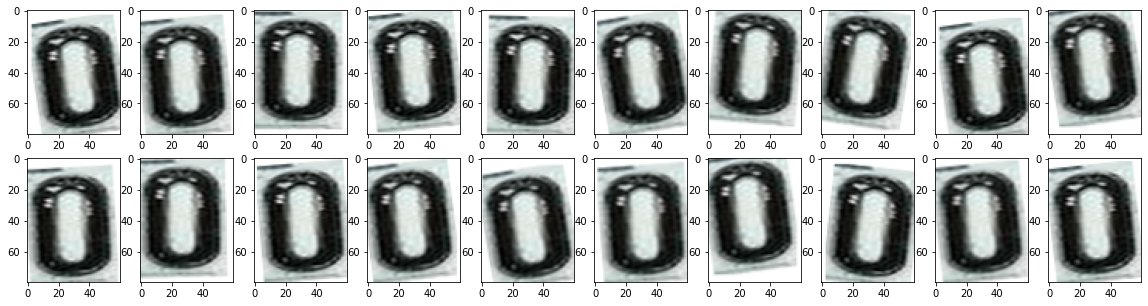

In [29]:
n = 20  #要生成幾張
random = ((np.random.random(n*3)-0.5)*2).reshape((-1,3))  # 一組要有 3 個亂數

f, axarr = plt.subplots(int(n/10), 10, figsize=(20, (int(n/10)-1)*5))
for a in range(n):
    times += 1
    # (img, zoom, angle(10), shiftx(3), shifty(5))
    new = rotaft(img, 0.95, random[a][0]*10, random[a][1]*3, random[a][2]*5) 
    #cv2.imwrite('./ ',mypath,'/{}.png'.format(times),  new)
    axarr[int(a/10)][a-int(a/10)*10].imshow(new)
plt.show()

# output

In [80]:
# 指定要列出所有檔案的目錄
mypath = "TraNum/Z"
allfile = []

# 遞迴列出所有檔案的絕對路徑
for root, dirs, files in os.walk(mypath):
    for f in files:
        fullpath = os.path.join(root, f)
        allfile.append(fullpath)
print(len(allfile))

10


In [81]:
n = int(1000/len(allfile))+1  # 至少要1000張
times = 1000
for a in range(len(allfile)):
    random = ((np.random.random(n*3)-0.5)*2).reshape((-1,3))  # 一組要有 3 個亂數
    img = cv2.imread(allfile[a])

    for b in range(n):
        times += 1
        new = rotaft(img, 0.95, random[b][0]*5, random[b][1]*3, random[b][2]*5) 
        cv2.imwrite('./'+mypath+'/{}.png'.format(times),  new)
        
    